In [ ]:
Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

In [5]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


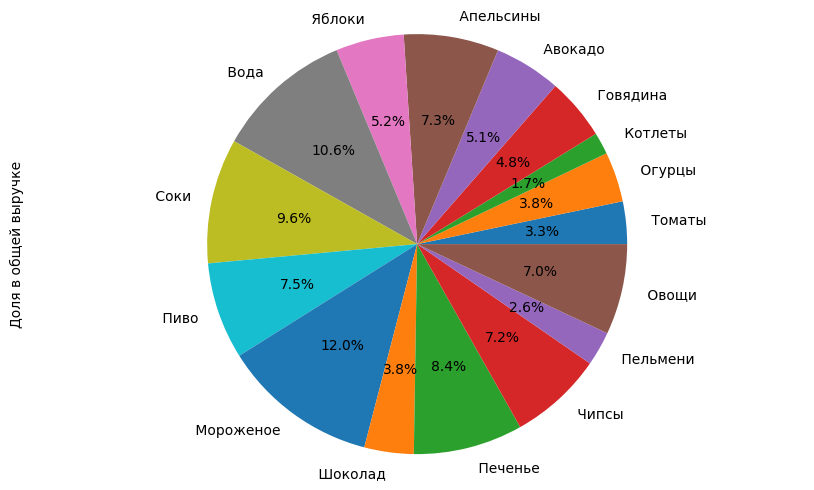

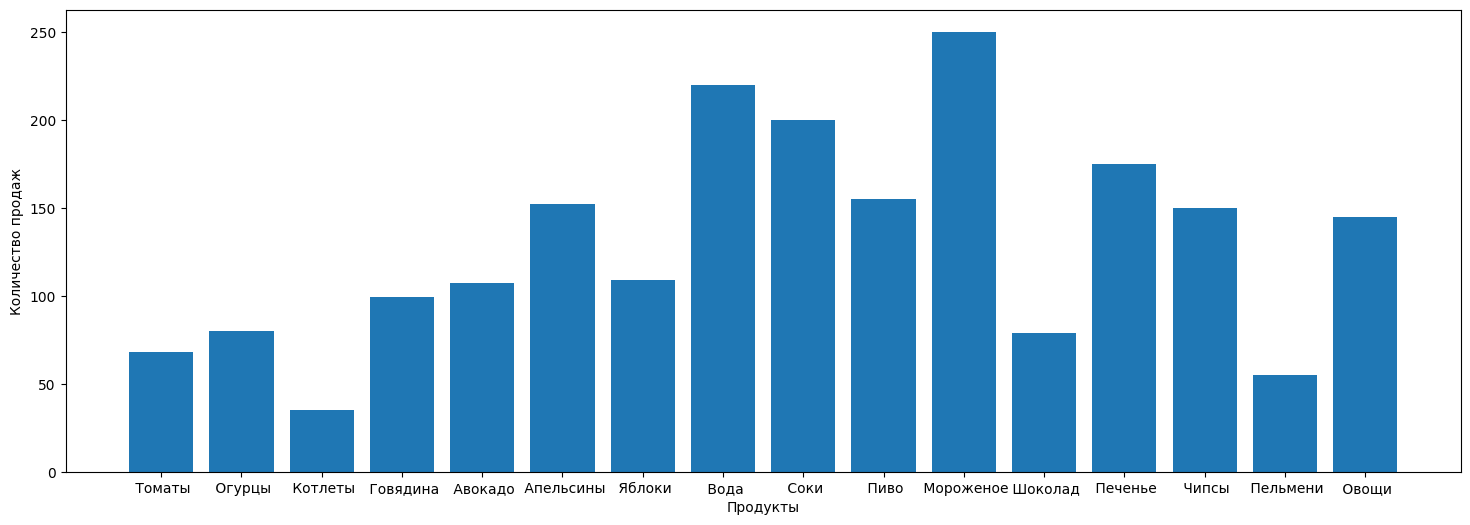

Общая выручка магазина: 305711.00
Товар, который был продан наибольшее количество раз:  Мороженое (250 шт.)
Товар, который принес наибольшую выручку:  Говядина (38511.00 руб.)

Отчет по каждому товару:
Название товара                Количество продаж    Доля в общей выручке
 Томаты                        68                   4.65%
 Огурцы                        80                   3.11%
 Котлеты                       35                   3.03%
 Говядина                      99                   12.60%
 Авокадо                       107                  9.42%
 Апельсины                     152                  8.40%
 Яблоки                        109                  4.96%
 Вода                          220                  7.12%
 Соки                          200                  7.85%
 Пиво                          155                  5.02%
 Мороженое                     250                  10.88%
 Шоколад                       79                   2.56%
 Печенье                   

In [31]:
import csv
from collections import defaultdict, Counter
import os
import numpy as np
import matplotlib.pyplot as plt


def read_kursovay(file_path):
    try:
        with open(file_path, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            kursovay = [row for row in reader]
        return kursovay
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return []
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []


def calculate_total_revenue(kursovay):
    total_revenue = sum(float(item['Общая стоимость']) for item in kursovay)
    return total_revenue


def find_most_sold_product(kursovay):
    product_sales = Counter()
    for item in kursovay:
        product_sales[item['Название товара']] += int(item['Количество продаж'])
    most_sold_product = product_sales.most_common(1)[0]
    return most_sold_product


def find_highest_revenue_product(kursovay):
    product_revenue = defaultdict(float)
    for item in kursovay:
        product_revenue[item['Название товара']] += float(item['Общая стоимость'])
    highest_revenue_product = max(product_revenue.items(), key=lambda x: x[1])
    return highest_revenue_product


def generate_report(kursovay):
    total_revenue = calculate_total_revenue(kursovay)
    most_sold_product, most_sold_quantity = find_most_sold_product(kursovay)
    highest_revenue_product, highest_revenue = find_highest_revenue_product(kursovay)

    product_sales = Counter()
    product_revenue = defaultdict(float)

    for item in kursovay:
        product_sales[item['Название товара']] += int(item['Количество продаж'])
        product_revenue[item['Название товара']] += float(item['Общая стоимость'])

    report = {
        'total_revenue': total_revenue,
        'most_sold_product': most_sold_product,
        'most_sold_quantity': most_sold_quantity,
        'highest_revenue_product': highest_revenue_product,
        'highest_revenue': highest_revenue,
        'product_sales': product_sales,
        'product_revenue': product_revenue
    }

    return report


def print_report(report):
    print(f"Общая выручка магазина: {report['total_revenue']:.2f}")
    print(
        f"Товар, который был продан наибольшее количество раз: {report['most_sold_product']} ({report['most_sold_quantity']} шт.)")
    print(
        f"Товар, который принес наибольшую выручку: {report['highest_revenue_product']} ({report['highest_revenue']:.2f} руб.)")

    print("\nОтчет по каждому товару:")
    print(f"{'Название товара':<30} {'Количество продаж':<20} {'Доля в общей выручке':<20}")
    for product, sales in report['product_sales'].items():
        revenue_share = (report['product_revenue'][product] / report['total_revenue']) * 100
        print(f"{product:<30} {sales:<20} {revenue_share:.2f}%")

products = list(report['product_sales'].keys())
quantities = list(report['product_sales'].values())

plt.figure(figsize=(10, 6))
plt.pie(quantities, labels=products, autopct='%1.1f%%')
plt.axis('equal') 
plt.ylabel('Доля в общей выручке')
plt.show()
plt.figure(figsize=(18, 6))
plt.bar(products, quantities)
plt.xlabel('Продукты')
plt.ylabel('Количество продаж')
plt.show()

if __name__ == "__main__":
    file_path = 'kursovay.csv'
    kursovay = read_kursovay(file_path)

    if kursovay:
        report = generate_report(kursovay)
        print_report(report)
        